In [52]:
#import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [53]:
#load the house price dataset
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Feature Selection

In [55]:
#checking all the columns whether they are correlated or not
''' #unwanted columns:'''

# unwanted :  area_type,availability,society,balcony
#  like this check for every column

df['location'].unique()
df['size'].unique()


#removing the unwanted columns
df=df.drop(['area_type','availability','society','balcony'],axis=1)


In [56]:
#HANDLING THE MISSING VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [57]:
# checking whih column have how many null values
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [58]:
#handle missing value in location column
df[df["location"].isnull()]
#how many times a particular unique value got repeated 
df["location"].value_counts()
#count of houses in whitefiled, sarjapur road are more so we are filling the nan with sarjapur road

#let us  add the nan location houses into sarjapur road
df['location']=df['location'].fillna("Sarjapur Road")
   

In [59]:
#check the location columns null value
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [60]:
#handle missing value in size column
df.isnull().sum()#check how many null values are there
#we have 16 rows with NaN 
#so we are filling it with the more number of houses 
# 2BHK is more so we are filling the same for NaN values
df['size']=df['size'].fillna("2 BHK")

#Check the nan values
df.isnull().sum()


location       0
size           0
total_sqft     0
bath          73
price          0
dtype: int64

In [61]:
#handle missing value in bath column
df[df['bath'].isnull()]
df.info()#(float)
avg_bath=df['bath'].mean()
#2.69 
med_bath=df['bath'].median()
#2.0
df['bath']=df['bath'].fillna(med_bath)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [62]:
#conveting from float value to int datatype
df['bath']=df['bath'].astype(int)
df['bath'].unique()

array([ 2,  5,  3,  4,  6,  1,  9,  8,  7, 11, 10, 14, 27, 12, 16, 40, 15,
       13, 18])

In [63]:
df.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  int64  
 4   price       13320 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 520.4+ KB


In [65]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12438 non-null  int64  
 4   price       12438 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 583.0+ KB


In [67]:
df['location'].value_counts()

location
Whitefield                   507
Sarjapur  Road               364
Electronic City              273
Thanisandra                  224
Kanakpura Road               223
                            ... 
Udayagiri                      1
pavitra paradise               1
kadubisnahalli                 1
Chuchangatta Colony            1
Electronic City Phase 1,       1
Name: count, Length: 1306, dtype: int64

In [68]:
#Handling the location column 
#to remove some spaces (before and after the content)
df['location']=df['location'].apply(lambda x:x.strip())


In [69]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12438, dtype: object

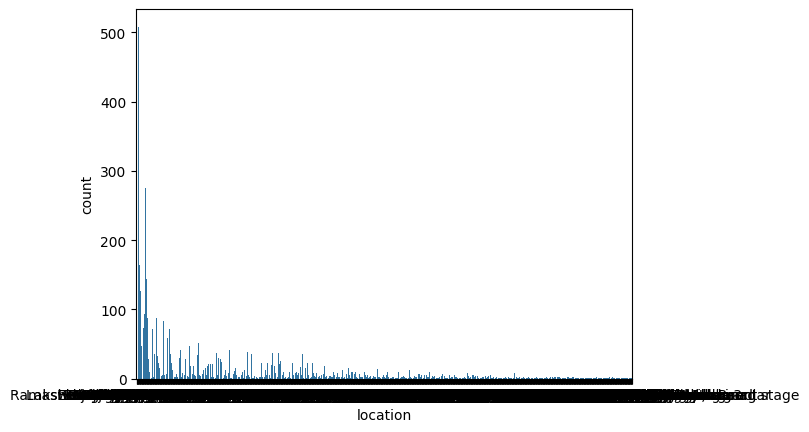

In [70]:
#visualize
sns.countplot(x='location',data=df)
#we have 1249 locatios which will not give proper visualization
#soo we are combining the location which are having the count<10
loc=df['location'].value_counts()
loc_less_than_10=loc[loc<=10]

df['location']=df['location'].apply(lambda x:"others" if x in loc_less_than_10 else x)
loc=df['location'].value_counts()
#as we reduced the ocation count now it will be easy to visualize


In [71]:
#FEATURE ENGINEERING

df.info()
#HANDLING THE SIZE COLUMN
#consizing the size column
out = [int(i.split()[0]) for i in df["size"]]

df['bhk']=out
df

<class 'pandas.core.frame.DataFrame'>
Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12438 non-null  int64  
 4   price       12438 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 583.0+ KB


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Uttarahalli,3 BHK,1440,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Kothanur,2 BHK,1200,2,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3,112.00,3
13315,Whitefield,5 Bedroom,3453,4,231.00,5
13316,others,4 BHK,3600,5,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2,60.00,2


In [72]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316                      others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12438, dtype: object

In [73]:
#HANDLING TOTAL SQ.FT COLUMN
df['total_sqft'].unique()

#split the data with respect to "-"
# covert them into integer 
#we can't use the lambda as it will be applying for every value
#we want to split we will create ur own function

#Handling total_sqft column
def clean_sqft(sqft):     
    l = sqft.split("-")
    if len(l)==2:
        return float(l[0])+float(l[1])/2
    try:
       return float(l[0]) 
    except:
        return None

    
df["total_sqft"] = df["total_sqft"].apply(clean_sqft)

df["total_sqft"] = df["total_sqft"].fillna(round(df["total_sqft"].mean()))

In [74]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12438 entries, 0 to 13318
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  float64
 3   bath        12438 non-null  int64  
 4   price       12438 non-null  float64
 5   bhk         12438 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 680.2+ KB


In [75]:
df['bath'].unique()
#there is nothing to change as there is no inconsistent value
df['price'].unique()
#there is nothing to change as there is no inconsistent value


array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ], shape=(1994,))

In [76]:
#create price_per_sqft
#to detect the outlier

# price/total_sqft=price_per_sqft

# create the new column
# *100000 to convert into lakhs
df['Price_per_sqft']=df["price"]*100000/df['total_sqft']
df


,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


In [77]:
#HANDLING OUTLIERS
#do u find any house with 1 sqft that is unrealistic
#in real the sqft willl benormally =<300

df.describe()


,total_sqft,bath,price,bhk,Price_per_sqft
count,12438.000000,12438.000000,12438.000000,12438.000000,1.243800e+04
mean,1589.759552,2.715549,115.408159,2.826821,8.077937e+03
std,1288.184379,1.367021,153.069125,1.323065,1.099456e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271357e+03
50%,1296.000000,2.000000,74.000000,3.000000,5.485678e+03
75%,1700.000000,3.000000,125.000000,3.000000,7.439638e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: xlabel='total_sqft'>

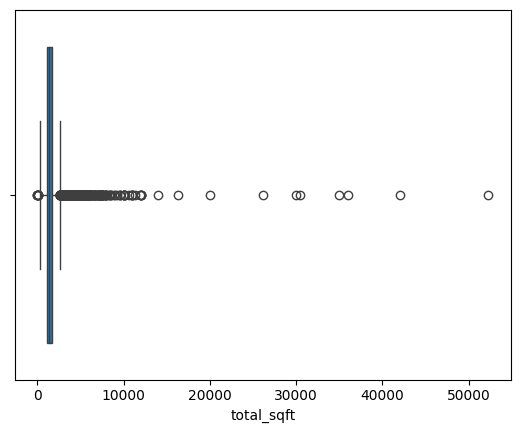

In [78]:
sns.boxplot(x='total_sqft',data=df)


In [79]:
#fetch the total_sqft <300 as they are the ouliers

# df[df['total_sqft']<300]

#formula= total_sqft/bhk>=300   - to delete the outliers
df=df[df['total_sqft']/df['bhk']>=300]
df.describe()#to check minimum



,total_sqft,bath,price,bhk,Price_per_sqft
count,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000
mean,1628.246502,2.579667,114.455648,2.666809,6377.474059
std,1313.481400,1.099383,156.421987,0.995743,4291.202802
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1124.000000,2.000000,50.000000,2.000000,4207.119741
50%,1320.000000,2.000000,71.000000,3.000000,5326.086957
75%,1735.000000,3.000000,120.000000,3.000000,6989.247312
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In total sqft we have some rooms with less than 300 sqft those are outliers

In [80]:
df

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


In [81]:
df.describe()

,total_sqft,bath,price,bhk,Price_per_sqft
count,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000
mean,1628.246502,2.579667,114.455648,2.666809,6377.474059
std,1313.481400,1.099383,156.421987,0.995743,4291.202802
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1124.000000,2.000000,50.000000,2.000000,4207.119741
50%,1320.000000,2.000000,71.000000,3.000000,5326.086957
75%,1735.000000,3.000000,120.000000,3.000000,6989.247312
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


<Axes: xlabel='bhk'>

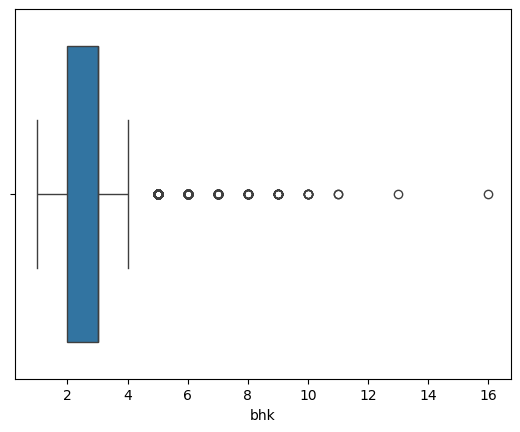

In [82]:
sns.boxplot(x='bhk',data=df)

In [83]:
df = df[df["bhk"]<=6]


In [84]:
#HANDLING OUTLIER IN BATH COLUMN
#bhk+2

df = df[df["bath"]<df["bhk"]+2]

df

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


In [85]:
df.describe()

,total_sqft,bath,price,bhk,Price_per_sqft
count,11467.000000,11467.000000,11467.000000,11467.000000,11467.000000
mean,1578.405069,2.496207,108.530990,2.607831,6300.778023
std,1199.065742,0.911130,137.233476,0.855586,4155.491934
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1115.500000,2.000000,49.750000,2.000000,4201.185164
50%,1306.000000,2.000000,70.000000,3.000000,5300.304878
75%,1700.000000,3.000000,115.000000,3.000000,6923.076923
max,52272.000000,7.000000,2912.000000,6.000000,176470.588235


<Axes: xlabel='Price_per_sqft'>

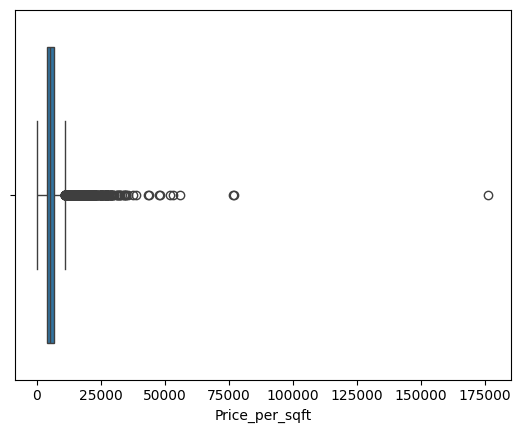

In [86]:
#IQR METHOD(notes)
#to handle the price column
sns.boxplot(x='Price_per_sqft',data=df)


<Axes: xlabel='Price_per_sqft'>

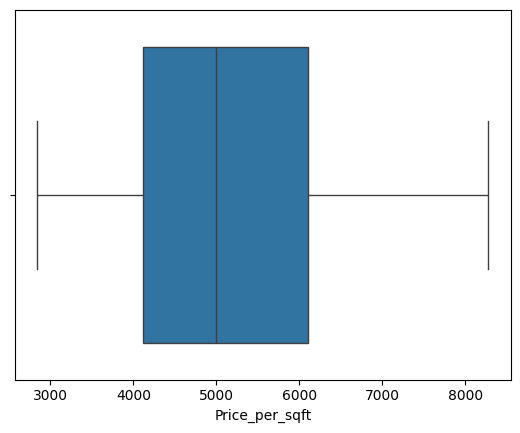

In [87]:
#handling the outlier in Price_per_sqft column

q1 = df["Price_per_sqft"].quantile(0.25)
q3 = df["Price_per_sqft"].quantile(0.75)

IQR = q3-q1


#1.5 is the standard value to dteect the outlier
#even if the outlier is not getting detected properly
#then change the value of 1.5 

# upper=q1+1.5*IQR
# lower=q1-1.5*IQR

lower = q1-0.5*IQR
upper = q3+0.5*IQR

df = df[(df["Price_per_sqft"]>=lower) & (df["Price_per_sqft"]<=upper)]
#fetch non outliers


sns.boxplot(x="Price_per_sqft",data=df)




<Axes: xlabel='Price_per_sqft'>

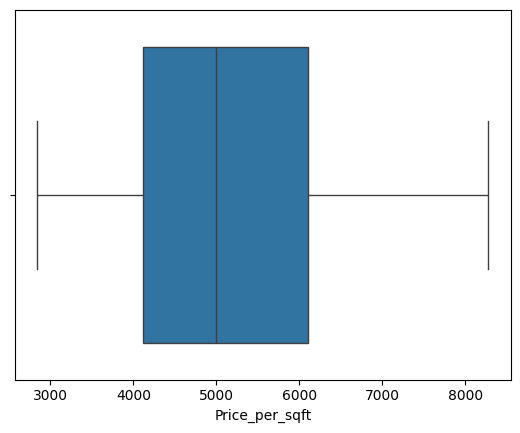

In [88]:
sns.boxplot(x="Price_per_sqft",data=df)


In [89]:
#reset the index
df.reset_index(inplace=True)
df=df.drop(['index','size','Price_per_sqft'],axis=1)

In [90]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
9429,Rachenahalli,1050.0,2,52.71,2
9430,Bellandur,1262.0,2,47.00,2
9431,Green Glen Layout,1715.0,3,112.00,3
9432,Whitefield,3453.0,4,231.00,5


MODEL TRAINING

In [91]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [92]:
#Before going to model training let us create a df for the cleaned data
df.to_csv("cleaned_df.csv")

In [93]:
#convert the object datatypes into numberical values
encoder=LabelEncoder()
df['encoded_loc']=encoder.fit_transform(df['location'])
df.head()

,location,total_sqft,bath,price,bhk,encoded_loc
0,Electronic City Phase II,1056.0,2,39.07,2,75
1,Chikka Tirupathi,2600.0,5,120.00,4,57
2,Uttarahalli,1440.0,2,62.00,3,216
3,Lingadheeranahalli,1521.0,3,95.00,3,154
4,Kothanur,1200.0,2,51.00,2,146


In [94]:
#divide the input and output
X=df.drop(["location",'price'],axis=1)
y=df.price

In [95]:
#split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [96]:
#model training 
model = RandomForestRegressor(random_state=42)
params = {
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6,7]
}

grid = GridSearchCV(estimator=model,param_grid=params,cv=5)

grid.fit(X_train,y_train)

print("Best params: ",grid.best_params_)
print("Best Score: ",grid.best_score_)

Best params:  {'max_depth': 6, 'n_estimators': 100}
Best Score:  0.8378896803414777


In [97]:
y_pred=grid.predict(X_test)
y_pred

array([81.70811547, 62.48712229, 52.0802134 , ..., 87.74696444,
       87.51731864, 46.21219355], shape=(2831,))

In [98]:
print("Training eff: ",grid.score(X_train,y_train))
print("Training eff: ",grid.score(X_test,y_test))


Training eff:  0.8904542819625919
Training eff:  0.8097621561902456


In [99]:
print("R2: ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))


R2:  0.8097621561902456
MAE :  14.87512822026094


In [103]:
df
#we have the encoded location which is not in the csv 
# let us add it into the csv
df.to_csv("cleaned_df.csv")

In [104]:
#now we have to include entire model into app file
import pickle
with open("RF_model.pkl","wb")as file:
    pickle.dump(grid,file)

    #dumps-used for txt data
    #dump-as we are pasisng the model(trained)

In [105]:
df

,location,total_sqft,bath,price,bhk,encoded_loc
0,Electronic City Phase II,1056.0,2,39.07,2,75
1,Chikka Tirupathi,2600.0,5,120.00,4,57
2,Uttarahalli,1440.0,2,62.00,3,216
3,Lingadheeranahalli,1521.0,3,95.00,3,154
4,Kothanur,1200.0,2,51.00,2,146
...,...,...,...,...,...,...
9429,Rachenahalli,1050.0,2,52.71,2,183
9430,Bellandur,1262.0,2,47.00,2,40
9431,Green Glen Layout,1715.0,3,112.00,3,83
9432,Whitefield,3453.0,4,231.00,5,224
